In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Walmart_Store_sales.csv")
# df

In [3]:
def get_metadata(dataframe):
    print(dataframe.info())
    print(dataframe.describe())
    print("Number of Duplicate Rows : ", dataframe.duplicated().sum())
    print("Sample dataset values :")
    print(dataframe.head(20))

In [4]:
get_metadata(dataframe=df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

In [5]:
df.drop(["Temperature","Unemployment"], axis="columns", inplace=True)

1) Which store has maximum sales

In [6]:
# df.groupby(['Store']).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum')).reset_index()

store_sales_df = df.groupby(['Store'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))
store_sales_df[(store_sales_df['Sum_of_Weekly_Sales'] == max(store_sales_df['Sum_of_Weekly_Sales']))]


,Store,Sum_of_Weekly_Sales
19,20,3.013978e+08


2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [7]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI
0,1,05-02-2010,1643690.90,0,2.572,211.096358
1,1,12-02-2010,1641957.44,1,2.548,211.242170
2,1,19-02-2010,1611968.17,0,2.514,211.289143
3,1,26-02-2010,1409727.59,0,2.561,211.319643
4,1,05-03-2010,1554806.68,0,2.625,211.350143
...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,3.997,192.013558
6431,45,05-10-2012,733455.07,0,3.985,192.170412
6432,45,12-10-2012,734464.36,0,4.000,192.327265
6433,45,19-10-2012,718125.53,0,3.969,192.330854


In [8]:
std_stores = df.groupby('Store', as_index=False).agg(Std_of_Weekly_Sales=('Weekly_Sales','std'))
std_stores[(std_stores['Std_of_Weekly_Sales'] == max(std_stores['Std_of_Weekly_Sales']))]

,Store,Std_of_Weekly_Sales
13,14,317569.949476


In [9]:
df[(df['Store']==14)]

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI
1859,14,05-02-2010,2623469.95,0,2.784,181.871190
1860,14,12-02-2010,1704218.84,1,2.773,181.982317
1861,14,19-02-2010,2204556.70,0,2.745,182.034782
1862,14,26-02-2010,2095591.63,0,2.754,182.077469
1863,14,05-03-2010,2237544.75,0,2.777,182.120157
...,...,...,...,...,...,...
1997,14,28-09-2012,1522512.20,0,3.997,192.013558
1998,14,05-10-2012,1687592.16,0,3.985,192.170412
1999,14,12-10-2012,1639585.61,0,4.000,192.327265
2000,14,19-10-2012,1590274.72,0,3.969,192.330854


In [10]:
df[(df['Store']==37)]

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI
5148,37,05-02-2010,536006.73,0,2.572,209.852966
5149,37,12-02-2010,529852.70,1,2.548,209.997021
5150,37,19-02-2010,510382.50,0,2.514,210.045102
5151,37,26-02-2010,513615.82,0,2.561,210.077189
5152,37,05-03-2010,519255.68,0,2.625,210.109275
...,...,...,...,...,...,...
5286,37,28-09-2012,527953.14,0,3.666,221.655600
5287,37,05-10-2012,546122.37,0,3.617,221.853340
5288,37,12-10-2012,521810.75,0,3.601,222.051079
5289,37,19-10-2012,551969.10,0,3.594,222.095172


In [11]:
#  coefficient of mean to standard deviation
stats_df = df.groupby('Store', as_index=False).agg(Sales_sum=('Weekly_Sales','sum'), 
                                        Mean_Sales=('Weekly_Sales','mean'), 
                                        Std_Sales=('Weekly_Sales', 'std'),
                                        Sales_Variance=('Weekly_Sales','var'))
stats_df

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10


In [12]:
stats_df['Coeff_of_Variance'] = stats_df['Std_Sales'] / stats_df['Mean_Sales']
stats_df

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance,Coeff_of_Variance
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10,0.100292
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10,0.123424
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09,0.115021
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10,0.127083
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09,0.118668
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10,0.135823
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10,0.197305
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10,0.116953
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09,0.126895
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10,0.159133


3) Which store/s has good quarterly growth rate in Q3’2012

In [13]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [14]:
def assign_quarter_category(month):
    if month <= 3:
        return 'Q1'
    elif month >= 4 and month <= 6:
        return 'Q2'
    elif month >=7 and month <= 9:
        return 'Q3'
    elif month >= 10 and month <= 12:
        return 'Q4'
    else:
        return np.nan    

In [15]:
df['Quarter'] = df['Month'].apply(assign_quarter_category)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Year,Month,Quarter
0,1,05-02-2010,1643690.90,0,2.572,211.096358,2010,5,Q2
1,1,12-02-2010,1641957.44,1,2.548,211.242170,2010,12,Q4
2,1,19-02-2010,1611968.17,0,2.514,211.289143,2010,2,Q1
3,1,26-02-2010,1409727.59,0,2.561,211.319643,2010,2,Q1
4,1,05-03-2010,1554806.68,0,2.625,211.350143,2010,5,Q2
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,3.997,192.013558,2012,9,Q3
6431,45,05-10-2012,733455.07,0,3.985,192.170412,2012,5,Q2
6432,45,12-10-2012,734464.36,0,4.000,192.327265,2012,12,Q4
6433,45,19-10-2012,718125.53,0,3.969,192.330854,2012,10,Q4


In [16]:
df_2012 = df[(df['Year']) == 2012]
df_2012.drop('Year', axis='columns', inplace=True)

C:\Users\Meaga Varsha R\AppData\Local\Temp\ipykernel_101352\1034052573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012.drop('Year', axis='columns', inplace=True)


In [17]:
df_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Month,Quarter
100,1,06-01-2012,1550369.92,0,3.157,219.714258,6,Q2
101,1,13-01-2012,1459601.17,0,3.261,219.892526,1,Q1
102,1,20-01-2012,1394393.84,0,3.268,219.985689,1,Q1
103,1,27-01-2012,1319325.59,0,3.290,220.078852,1,Q1
104,1,03-02-2012,1636339.65,0,3.360,220.172015,3,Q1
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,3.997,192.013558,9,Q3
6431,45,05-10-2012,733455.07,0,3.985,192.170412,5,Q2
6432,45,12-10-2012,734464.36,0,4.000,192.327265,12,Q4
6433,45,19-10-2012,718125.53,0,3.969,192.330854,10,Q4


In [18]:
q_sales = df_2012.groupby(["Store", "Quarter"]).agg(Quarterwise_Sales=('Weekly_Sales', 'sum'))
q_sales

Quarterwise_Sales
Store Quarter                   
1     Q1             18951097.69
      Q2             21036965.58
      Q3             18633209.98
      Q4              9580784.77
2     Q1             22543946.63
...                          ...
44    Q4              2022983.83
45    Q1              9073434.67
      Q2             10278900.05
      Q3              8851242.32
      Q4              4520053.13

[180 rows x 1 columns]

<AxesSubplot:xlabel='Store,Quarter'>

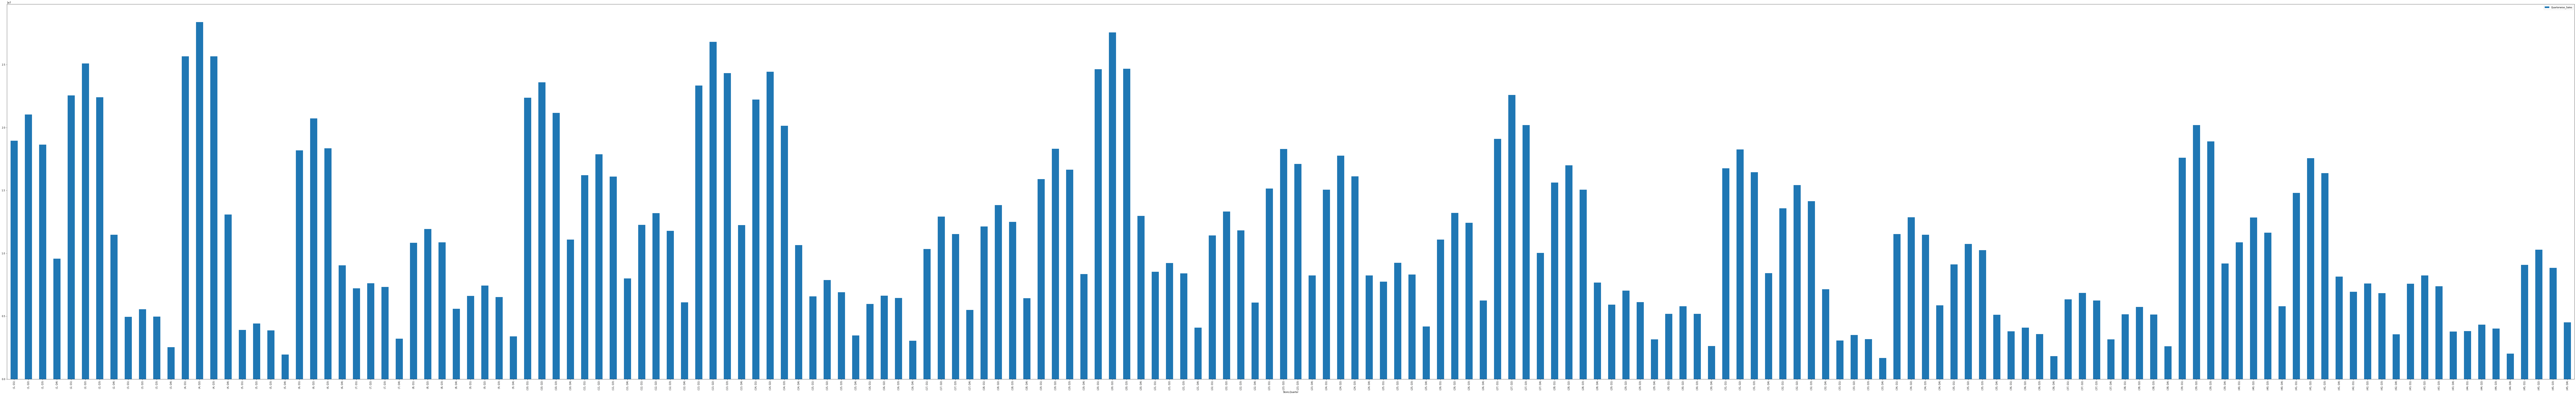

In [19]:
# q_sales.plot.pie(subplots=True, figsize=(5, 5))
q_sales.plot(kind = 'bar', figsize=(200, 30))

In [20]:
df_2012['Date'] = pd.to_datetime(df_2012['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-02-2012' in DD/MM/YYYY format. Provide format or specif

In [21]:
# df_2012.groupby(pd.Grouper(key='Date', freq='Q'))['Weekly_Sales'].sum()

In [22]:
q_sales

Quarterwise_Sales
Store Quarter                   
1     Q1             18951097.69
      Q2             21036965.58
      Q3             18633209.98
      Q4              9580784.77
2     Q1             22543946.63
...                          ...
44    Q4              2022983.83
45    Q1              9073434.67
      Q2             10278900.05
      Q3              8851242.32
      Q4              4520053.13

[180 rows x 1 columns]

In [23]:
quarterly_percentage = q_sales.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
quarterly_percentage

Quarterwise_Sales
Store Quarter                   
1     Q1               27.786695
      Q2               30.845060
      Q3               27.320598
      Q4               14.047648
2     Q1               27.662406
...                          ...
44    Q4               14.259044
45    Q1               27.727470
      Q2               31.411246
      Q3               27.048473
      Q4               13.812811

[180 rows x 1 columns]

In [24]:
quarterly_percentage.reset_index(inplace=True)
quarterly_percentage[(quarterly_percentage['Quarter']) == 'Q3']

,Store,Quarter,Quarterwise_Sales
2,1,Q3,27.320598
6,2,Q3,27.481933
10,3,Q3,27.554232
14,4,Q3,27.650955
18,5,Q3,27.388427
22,6,Q3,27.657707
26,7,Q3,28.865192
30,8,Q3,27.715457
34,9,Q3,27.230464
38,10,Q3,27.060885


In [25]:
quarterly_percentage[(quarterly_percentage['Quarterwise_Sales'] == max(quarterly_percentage['Quarterwise_Sales']))]

,Store,Quarter,Quarterwise_Sales
65,17,Q2,32.068439


4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [26]:
non_holiday = df[(df['Holiday_Flag']) == 0]
holiday = df[(df['Holiday_Flag']) == 1]
print("Average Weekly_Sales for entire Dataset : ", df['Weekly_Sales'].mean())
print("Average Weekly_Sales on Non-Holiday Weeks : ", non_holiday['Weekly_Sales'].mean())
print("Average Weekly_Sales on Holiday Weeks : ", holiday['Weekly_Sales'].mean())

Average Weekly_Sales for entire Dataset :  1046964.8775617732
Average Weekly_Sales on Non-Holiday Weeks :  1041256.3802088564
Average Weekly_Sales on Holiday Weeks :  1122887.8923555554


In [27]:
mean_holiday_sales = holiday.groupby("Date", as_index=False).agg(Mean_Sales=('Weekly_Sales','mean'))
mean_holiday_sales

,Date,Mean_Sales
0,07-09-2012,1.074001e+06
1,09-09-2011,1.039183e+06
2,10-02-2012,1.111320e+06
3,10-09-2010,1.014098e+06
4,11-02-2011,1.051915e+06
5,12-02-2010,1.074148e+06
6,25-11-2011,1.479858e+06
7,26-11-2010,1.462689e+06
8,30-12-2011,1.023166e+06
9,31-12-2010,8.985004e+05


In [28]:
mean_holiday_sales[(mean_holiday_sales['Mean_Sales']) > non_holiday['Weekly_Sales'].mean()].sort_values('Mean_Sales', 
                                                                                                        ascending=False)

,Date,Mean_Sales
6,25-11-2011,1.479858e+06
7,26-11-2010,1.462689e+06
2,10-02-2012,1.111320e+06
5,12-02-2010,1.074148e+06
0,07-09-2012,1.074001e+06
4,11-02-2011,1.051915e+06


## TBD

In [29]:
def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']:
        return 'Christmas'
    else:
        return 'Non-Holiday'   

In [31]:
pivotted_df = pd.pivot_table(df, index=["Holiday_Flag","Store"], aggfunc={'Weekly_Sales':np.mean})
# print(pivotted_df.to_string())
pivotted_df

Weekly_Sales
Holiday_Flag Store              
0            1      1.546957e+06
             2      1.914209e+06
             3      4.000648e+05
             4      2.083556e+06
             5      3.148923e+05
...                          ...
1            41     1.334948e+06
             42     5.676942e+05
             43     6.359463e+05
             44     2.960356e+05
             45     8.362937e+05

[90 rows x 1 columns]